In [13]:
import pandas as pd
from google.colab import drive
!pip install pyreadr
!pip install category_encoders
from category_encoders import TargetEncoder
import pyreadr
drive.mount('/content/gdrive')
pd.options.display.max_columns = 50
import numpy as np
from openpyxl import Workbook, load_workbook
from datetime import datetime
from sklearn.preprocessing import PowerTransformer


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
data = pd.read_csv('/content/gdrive/My Drive/Teachers_Model_B/combined_dataset1.csv')

<ipython-input-14-34977fccd088>:1: DtypeWarning: Columns (3,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/gdrive/My Drive/Teachers_Model_B/combined_dataset1.csv')


In [15]:
data.columns

Index(['PRODUCT', 'REPORT_DATE', 'MERGE_KEY', 'CUST_MERGE_KEY', 'ACCOUNT_NAME',
       'PRODUCT_SCHEME', 'DISBURSAL_DATE', 'ORIGINAL_MATURITY_DATE',
       'LOAN_AMOUNT', 'ADDRESS', 'INTEREST_RATE', 'REGION', 'GEO_AREA',
       'OS_BAL', 'TERM', 'DPD'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9768377 entries, 0 to 9768376
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   PRODUCT                 object 
 1   REPORT_DATE             object 
 2   MERGE_KEY               object 
 3   CUST_MERGE_KEY          object 
 4   ACCOUNT_NAME            object 
 5   PRODUCT_SCHEME          object 
 6   DISBURSAL_DATE          object 
 7   ORIGINAL_MATURITY_DATE  object 
 8   LOAN_AMOUNT             float64
 9   ADDRESS                 object 
 10  INTEREST_RATE           float64
 11  REGION                  object 
 12  GEO_AREA                object 
 13  OS_BAL                  float64
 14  TERM                    float64
 15  DPD                     float64
dtypes: float64(5), object(11)
memory usage: 1.2+ GB


In [ ]:
data.describe()

,LOAN_AMOUNT,INTEREST_RATE,OS_BAL,TERM,DPD
count,9.761131e+06,9.761804e+06,9.768377e+06,9.760645e+06,9.768377e+06
mean,2.448361e+05,9.383727e+00,1.848994e+05,4.214381e+01,2.280037e+00
std,1.825210e+05,1.367183e+00,1.805220e+05,1.565064e+01,8.412411e+00
min,3.000000e+03,0.000000e+00,-2.765253e+05,0.000000e+00,-5.000000e+00
25%,1.000000e+05,9.660000e+00,5.267950e+04,3.600000e+01,0.000000e+00
50%,2.000000e+05,9.660000e+00,1.294001e+05,3.600000e+01,0.000000e+00
75%,3.400000e+05,9.660000e+00,2.629392e+05,6.000000e+01,0.000000e+00
max,4.000000e+06,5.200000e+01,3.871569e+06,9.933000e+03,2.860000e+02


In [16]:
# data1 = data.dropna()
data1 = data.copy()

In [17]:
data2 = data1.drop_duplicates()

In [ ]:
# df_no_duplicates = data2.drop_duplicates(subset=['ACCOUNT_NAME', 'ADDRESS'])


In [ ]:
# df_no_duplicates.loc[df_no_duplicates["ACCOUNT_NAME"] == "VILLANUEVA, ZENIA YASAY"]

In [30]:
data3 = data2.copy()

In [ ]:
# data3.loc[data3["ACCOUNT_NAME"] == "VILLANUEVA, ZENIA YASAY"]

,PRODUCT,REPORT_DATE,MERGE_KEY,CUST_MERGE_KEY,ACCOUNT_NAME,PRODUCT_SCHEME,DISBURSAL_DATE,ORIGINAL_MATURITY_DATE,LOAN_AMOUNT,ADDRESS,INTEREST_RATE,REGION,GEO_AREA,OS_BAL,TERM,DPD
9768211,DE129,2021-01-31,455LRD2101001095,ZYV071581,"VILLANUEVA, ZENIA YASAY",NaN,2021-01-15,2024-01-31,32000.0,PRK COTTON BRGY CABADIANGAN SIPALAY CITY NEGRO...,9.66,NaN,NaN,32000.0,36.0,0.0


In [ ]:
# data3['REPORT_DATE'] = pd.to_datetime(data3['REPORT_DATE'])

In [ ]:
# data3['REPORT_DATE'] = data3['REPORT_DATE'].dt.strftime('%Y-%m')

# df = data3.sort_values(by='REPORT_DATE')


# data3['Balance_Change'] = df['OS_BAL'].diff()

# consecutive_months = data3[(data3['Balance_Change'] == 0) & (data3['Balance_Change'].shift(-1) == 0)]

# print(consecutive_months[['REPORT_DATE', 'OS_BAL', 'ACCOUNT_NAME']])

In [31]:
data3['DPD90'] = np.where(data3['DPD'] > 3, 1, 0)

In [32]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9768373 entries, 0 to 9768376
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   PRODUCT                 object 
 1   REPORT_DATE             object 
 2   MERGE_KEY               object 
 3   CUST_MERGE_KEY          object 
 4   ACCOUNT_NAME            object 
 5   PRODUCT_SCHEME          object 
 6   DISBURSAL_DATE          object 
 7   ORIGINAL_MATURITY_DATE  object 
 8   LOAN_AMOUNT             float64
 9   ADDRESS                 object 
 10  INTEREST_RATE           float64
 11  REGION                  object 
 12  GEO_AREA                object 
 13  OS_BAL                  float64
 14  TERM                    float64
 15  DPD                     float64
 16  DPD90                   int64  
dtypes: float64(5), int64(1), object(11)
memory usage: 1.3+ GB


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt


# dpd90_counts = data3.groupby(['REPORT_DATE', 'DPD90']).size().unstack().fillna(0)

# # Calculate percentages for each category (True and False) for each date
# dpd90_percentages = dpd90_counts.div(dpd90_counts.sum(axis=1), axis=0) * 100

# # Create figure and axes objects
# fig, ax = plt.subplots(figsize=(15, 8))  # Adjust width and height as needed

# dpd90_counts.plot(kind='bar', stacked=True, width=1.0, ax=ax)

# # Annotate bars with percentages
# for i in range(len(dpd90_counts)):
#     total = dpd90_counts.iloc[i].sum()
#     for j in range(len(dpd90_counts.columns)):
#         if dpd90_counts.iloc[i, j] > 0:
#             percentage = dpd90_counts.iloc[i, j] / total * 100
#             ax.text(i, dpd90_counts.iloc[i, :j].sum() + dpd90_counts.iloc[i, j] / 2,
#                     f"{percentage:.1f}%", ha='center', va='center', fontsize=8)

# plt.xlabel('Date')
# plt.ylabel('Count')
# plt.title('Distribution of True and False in DPD90 over Time')
# plt.legend(title='DPD90')
# plt.grid(True)
# plt.show()

In [ ]:
# data3['DPD60'] = np.where(data3['DPD'] > 2, 1, 0)

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# dpd60_counts = data3.groupby(['REPORT_DATE', 'DPD60']).size().unstack().fillna(0)

# # Calculate percentages for each category (True and False) for each date
# dpd60_percentages = dpd60_counts.div(dpd60_counts.sum(axis=1), axis=0) * 100

# # Create figure and axes objects
# fig, ax = plt.subplots(figsize=(15, 8))  # Adjust width and height as needed

# dpd60_counts.plot(kind='bar', stacked=True, width=1.0, ax=ax)

# # Annotate bars with percentages
# for i in range(len(dpd60_counts)):
#     total = dpd60_counts.iloc[i].sum()
#     for j in range(len(dpd60_counts.columns)):
#         if dpd60_counts.iloc[i, j] > 0:
#             percentage = dpd60_counts.iloc[i, j] / total * 100
#             ax.text(i, dpd60_counts.iloc[i, :j].sum() + dpd60_counts.iloc[i, j] / 2,
#                     f"{percentage:.1f}%", ha='center', va='center', fontsize=8)

# plt.xlabel('Date')
# plt.ylabel('Count')
# plt.title('Distribution of True and False in DPD60 over Time')
# plt.legend(title='DPD60')
# plt.grid(True)
# plt.show()

In [ ]:
# data3['DPD30'] = np.where(data3['DPD'] > 1, 1, 0)

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# dpd30_counts = data3.groupby(['REPORT_DATE', 'DPD30']).size().unstack().fillna(0)

# # Calculate percentages for each category (True and False) for each date
# dpd30_percentages = dpd30_counts.div(dpd30_counts.sum(axis=1), axis=0) * 100

# # Create figure and axes objects
# fig, ax = plt.subplots(figsize=(15, 8))  # Adjust width and height as needed

# dpd30_counts.plot(kind='bar', stacked=True, width=1.0, ax=ax)

# # Annotate bars with percentages
# for i in range(len(dpd30_counts)):
#     total = dpd30_counts.iloc[i].sum()
#     for j in range(len(dpd30_counts.columns)):
#         if dpd30_counts.iloc[i, j] > 0:
#             percentage = dpd30_counts.iloc[i, j] / total * 100
#             ax.text(i, dpd30_counts.iloc[i, :j].sum() + dpd30_counts.iloc[i, j] / 2,
#                     f"{percentage:.1f}%", ha='center', va='center', fontsize=8)

# plt.xlabel('Date')
# plt.ylabel('Count')
# plt.title('Distribution of True and False in DPD60 over Time')
# plt.legend(title='DPD30')
# plt.grid(True)
# plt.show()

<ipython-input-33-3e5bd4544543>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data3.corr()


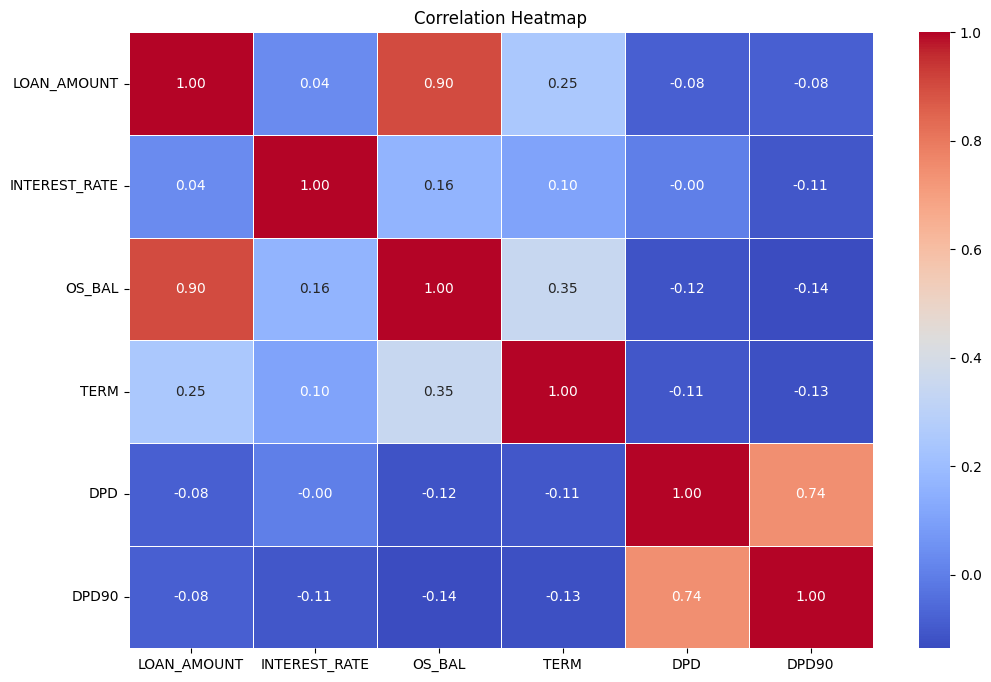

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a correlation matrix
correlation_matrix = data3.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
# data3.drop(columns = ["OS_BAL", "DPD"],inplace = True)
data3.drop(columns = ["DPD"],inplace = True)


In [35]:
data3.columns

Index(['PRODUCT', 'REPORT_DATE', 'MERGE_KEY', 'CUST_MERGE_KEY', 'ACCOUNT_NAME',
       'PRODUCT_SCHEME', 'DISBURSAL_DATE', 'ORIGINAL_MATURITY_DATE',
       'LOAN_AMOUNT', 'ADDRESS', 'INTEREST_RATE', 'REGION', 'GEO_AREA',
       'OS_BAL', 'TERM', 'DPD90'],
      dtype='object')

In [36]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9768373 entries, 0 to 9768376
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   PRODUCT                 object 
 1   REPORT_DATE             object 
 2   MERGE_KEY               object 
 3   CUST_MERGE_KEY          object 
 4   ACCOUNT_NAME            object 
 5   PRODUCT_SCHEME          object 
 6   DISBURSAL_DATE          object 
 7   ORIGINAL_MATURITY_DATE  object 
 8   LOAN_AMOUNT             float64
 9   ADDRESS                 object 
 10  INTEREST_RATE           float64
 11  REGION                  object 
 12  GEO_AREA                object 
 13  OS_BAL                  float64
 14  TERM                    float64
 15  DPD90                   int64  
dtypes: float64(4), int64(1), object(11)
memory usage: 1.2+ GB


In [37]:
# Convert date columns to datetime
data3['REPORT_DATE'] = pd.to_datetime(data3['REPORT_DATE'])
data3['DISBURSAL_DATE'] = pd.to_datetime(data3['DISBURSAL_DATE'])
data3['ORIGINAL_MATURITY_DATE'] = pd.to_datetime(data3['ORIGINAL_MATURITY_DATE'], errors='coerce')



In [38]:
# Calculate the duration of the loan
data3['LOAN_DURATION_DAYS'] = (data3['ORIGINAL_MATURITY_DATE'] - data3['DISBURSAL_DATE']).dt.days


#  ---->> taken from Nirmal<<------
# Monthly Payment
data3['Monthly_Payment'] = (data3['LOAN_AMOUNT'] *
                                  (1 + data3['INTEREST_RATE'] / 100) ** data3['TERM']) / data3['TERM']

#  ---->> taken from Nirmal<<------


# Creating a new feature by multiplying loan amount and interest rate
data3['AMOUNT_TIMES_INTEREST'] = data3['LOAN_AMOUNT'] * data3['INTEREST_RATE']

In [39]:
# Calculate mean and median loan amount by region
mean_loan_by_region = data3.groupby('REGION')['LOAN_AMOUNT'].mean().rename('MEAN_LOAN_AMOUNT_BY_REGION').reset_index()
median_loan_by_region = data3.groupby('REGION')['LOAN_AMOUNT'].median().rename('MEDIAN_LOAN_AMOUNT_BY_REGION').reset_index()

# Merge aggregated statistics back to the original DataFrame
data3 = data3.merge(mean_loan_by_region, on='REGION')
data3 = data3.merge(median_loan_by_region, on='REGION')

In [40]:
# Number of Active Loans for Each Customer
#  ---->> taken from Nirmal<<------
data3['Active_Loans_Count'] = data3.groupby('CUST_MERGE_KEY')['MERGE_KEY'].transform('nunique')

#  ---->> taken from Nirmal<<------

In [41]:
#Tenor variables
data3['LOAN_DURATION_MONTHS'] = (data3['ORIGINAL_MATURITY_DATE'] - data3['DISBURSAL_DATE']).dt.days / 30

# Find the index of the longest loan for each borrower
longest_loan_index = data3.groupby('CUST_MERGE_KEY')['LOAN_DURATION_MONTHS'].idxmax().dropna()

# Find the index of the shortest loan for each borrower
shortest_loan_index = data3.groupby('CUST_MERGE_KEY')['LOAN_DURATION_MONTHS'].idxmin().dropna()

# Create new variables for the original tenor of the longest and shortest loans
data3['ORIGINAL_TENOR_LONGEST_LOAN'] = 0  # Initialize the variable
data3['ORIGINAL_TENOR_SHORTEST_LOAN'] = 0  # Initialize the variable

data3.loc[longest_loan_index, 'ORIGINAL_TENOR_LONGEST_LOAN'] = data3.loc[longest_loan_index, 'LOAN_DURATION_MONTHS']
data3.loc[shortest_loan_index, 'ORIGINAL_TENOR_SHORTEST_LOAN'] = data3.loc[shortest_loan_index, 'LOAN_DURATION_MONTHS']

In [45]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480115 entries, 0 to 6480114
Data columns (total 25 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   PRODUCT                       object        
 1   REPORT_DATE                   datetime64[ns]
 2   MERGE_KEY                     object        
 3   CUST_MERGE_KEY                object        
 4   ACCOUNT_NAME                  object        
 5   PRODUCT_SCHEME                object        
 6   DISBURSAL_DATE                datetime64[ns]
 7   ORIGINAL_MATURITY_DATE        datetime64[ns]
 8   LOAN_AMOUNT                   float64       
 9   ADDRESS                       object        
 10  INTEREST_RATE                 float64       
 11  REGION                        object        
 12  GEO_AREA                      object        
 13  OS_BAL                        float64       
 14  TERM                          float64       
 15  DPD90                         in

In [ ]:
data3.isnull().sum()

PRODUCT                               0
REPORT_DATE                           0
MERGE_KEY                          3614
CUST_MERGE_KEY                      121
ACCOUNT_NAME                       1548
PRODUCT_SCHEME                   292917
DISBURSAL_DATE                        0
ORIGINAL_MATURITY_DATE          3212476
LOAN_AMOUNT                        2038
ADDRESS                          295544
INTEREST_RATE                      2030
REGION                                0
GEO_AREA                        1166440
OS_BAL                                0
TERM                               2030
DPD90                                 0
LOAN_DURATION_DAYS              3212476
Monthly_Payment                    2039
AMOUNT_TIMES_INTEREST              2039
MEAN_LOAN_AMOUNT_BY_REGION            0
MEDIAN_LOAN_AMOUNT_BY_REGION          0
Active_Loans_Count                  121
dtype: int64

In [ ]:
data3.columns

Index(['PRODUCT', 'REPORT_DATE', 'MERGE_KEY', 'CUST_MERGE_KEY', 'ACCOUNT_NAME',
       'PRODUCT_SCHEME', 'DISBURSAL_DATE', 'ORIGINAL_MATURITY_DATE',
       'LOAN_AMOUNT', 'ADDRESS', 'INTEREST_RATE', 'REGION', 'GEO_AREA',
       'OS_BAL', 'TERM', 'DPD90', 'LOAN_DURATION_DAYS', 'Monthly_Payment',
       'AMOUNT_TIMES_INTEREST', 'MEAN_LOAN_AMOUNT_BY_REGION',
       'MEDIAN_LOAN_AMOUNT_BY_REGION', 'Active_Loans_Count'],
      dtype='object')

In [ ]:
data3.drop(columns = ["DISBURSAL_DATE", "ORIGINAL_MATURITY_DATE", "ADDRESS", "MERGE_KEY", "CUST_MERGE_KEY", "ACCOUNT_NAME"],inplace = True)


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480115 entries, 0 to 6480114
Data columns (total 16 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   PRODUCT                       object        
 1   REPORT_DATE                   datetime64[ns]
 2   PRODUCT_SCHEME                object        
 3   LOAN_AMOUNT                   float64       
 4   INTEREST_RATE                 float64       
 5   REGION                        object        
 6   GEO_AREA                      object        
 7   OS_BAL                        float64       
 8   TERM                          float64       
 9   DPD90                         int64         
 10  LOAN_DURATION_DAYS            float64       
 11  Monthly_Payment               float64       
 12  AMOUNT_TIMES_INTEREST         float64       
 13  MEAN_LOAN_AMOUNT_BY_REGION    float64       
 14  MEDIAN_LOAN_AMOUNT_BY_REGION  float64       
 15  Active_Loans_Count            fl

In [ ]:
data3.isnull().sum()

PRODUCT                               0
REPORT_DATE                           0
PRODUCT_SCHEME                   292917
LOAN_AMOUNT                        2038
INTEREST_RATE                      2030
REGION                                0
GEO_AREA                        1166440
OS_BAL                                0
TERM                               2030
DPD90                                 0
LOAN_DURATION_DAYS              3212476
Monthly_Payment                    2039
AMOUNT_TIMES_INTEREST              2039
MEAN_LOAN_AMOUNT_BY_REGION            0
MEDIAN_LOAN_AMOUNT_BY_REGION          0
Active_Loans_Count                  121
dtype: int64

In [ ]:
data3 = data3.dropna()

In [ ]:
data3 = pd.get_dummies(data3, columns=['PRODUCT', 'REGION', 'GEO_AREA', 'PRODUCT_SCHEME'])

In [ ]:
# data4 = data3.drop_duplicates()
# data5 = data4.dropna()

In [ ]:
# Saving the data set
csv_file_path = '/content/gdrive/My Drive/Teachers_Model_B/dpedB_data_90.csv'
data3.to_csv(csv_file_path, index=False)

In [ ]:
import pandas as pd
data3 = pd.read_csv('/content/gdrive/My Drive/Teachers_Model_B/dpedB_data_90.csv')



In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974722 entries, 0 to 2974721
Data columns (total 60 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   REPORT_DATE                           object 
 1   LOAN_AMOUNT                           float64
 2   INTEREST_RATE                         float64
 3   OS_BAL                                float64
 4   TERM                                  float64
 5   DPD90                                 int64  
 6   LOAN_DURATION_DAYS                    float64
 7   Monthly_Payment                       float64
 8   AMOUNT_TIMES_INTEREST                 float64
 9   MEAN_LOAN_AMOUNT_BY_REGION            float64
 10  MEDIAN_LOAN_AMOUNT_BY_REGION          float64
 11  Active_Loans_Count                    float64
 12  PRODUCT_01.01 DEPED                   int64  
 13  PRODUCT_01.02 DEPED CALAMITY          int64  
 14  REGION_04A                            int64  
 15  REGION_04B     

In [ ]:

# Training and testing data
start_date_train = '2022-07-01'
end_date_train = '2022-11-30'
training_data = data3[(data3['REPORT_DATE'] >= start_date_train) & (data3['REPORT_DATE'] <= end_date_train)]
# training_data.dropna(inplace=True)
# Validation set data
start_date_val= '2022-12-01'
end_date_val = '2023-01-30'
Val_data = data3[(data3['REPORT_DATE'] >= start_date_val) & (data3['REPORT_DATE'] <= end_date_val)]
# Target data
target_train = training_data.DPD90
target_Val = Val_data.DPD90


In [ ]:
# Dropping target and date
training_data.drop(columns = ['REPORT_DATE', 'DPD90'], inplace = True)
Val_data.drop(columns = ['REPORT_DATE', 'DPD90'], inplace = True)

<ipython-input-27-dcd7c4edcbf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.drop(columns = ['REPORT_DATE', 'DPD90'], inplace = True)
<ipython-input-27-dcd7c4edcbf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Val_data.drop(columns = ['REPORT_DATE', 'DPD90'], inplace = True)


In [ ]:
# Model design Xgboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss, mean_squared_error, mean_absolute_error
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pd.set_option('display.float_format', lambda x: '%.6f' % x)


from imblearn.under_sampling import RandomUnderSampler
import numpy as np



# Unsampled data for prediction

training_data.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(training_data, target_train, test_size=0.20, random_state=42)

xgb_model = xgb.XGBClassifier(learning_rate=0.2, random_state = 42, max_depth= 2, n_estimators= 500, reg_alpha = 0.1, reg_lambda =  10 )
xgb_model.fit(X_train1, y_train1)





<ipython-input-28-c9c5eb8110b4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.replace([np.inf, -np.inf], np.nan, inplace=True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:

def score(expected,predicted,cutoff):
    target_0=len([x for x in expected if x==0])
    target_1=len([x for x in expected if x==1])
    bad_rate=target_1/(target_1+target_0)

    fpr, tpr, threshold_train = roc_curve(expected,predicted)
    roc_auc = auc(fpr, tpr)
    gini = (roc_auc*2-1)
    ks = max(tpr - fpr)
    predicted_bool=[1 if x>=cutoff else 0 for x in predicted]
    Accuracy=accuracy_score(expected,predicted_bool)
    Precision=precision_score(expected,predicted_bool)
    Sensitivity=recall_score(expected,predicted_bool)
    Specificity=recall_score(expected,predicted_bool, pos_label=0)
    F1=f1_score(expected,predicted_bool)
    Balanced_accuracy=balanced_accuracy_score(expected,predicted_bool)
    cm=confusion_matrix(expected,predicted_bool)
    TP=cm[1][1]
    FP=cm[0][1]
    TN=cm[0][0]
    FN=cm[1][0]
    metrics=[target_0,target_1,bad_rate,roc_auc,gini,ks, cutoff,Accuracy,Balanced_accuracy,Sensitivity,Specificity,Precision,F1,TP,FP,FN,TN]
    return metrics


# Predict on the test set
y_pred_test = xgb_model.predict(X_test1)
y_pred_prob_test = xgb_model.predict_proba(X_test1)[:, 1]
# Predit on the VaI data
y_pred_v = xgb_model.predict(Val_data)
y_pred_prob_v = xgb_model.predict_proba(Val_data)[:, 1]
# Predict on train
y_pred_train = xgb_model.predict(X_train1)
y_pred_prob_train = xgb_model.predict_proba(X_train1)[:, 1]

cutoff=0.04
index=['Majority_obs','Minority_obs','Bad_rate','AUC','Gini','KS', 'Cut_off','Accuracy','Balanced_Accuracy','Sensitivty','Specificity','Precision','F1',
         'TP','FP','FN','TN']
score_test=score(y_test1,y_pred_test,cutoff)
score_train=score(y_train1,y_pred_train,cutoff)

score_oot=score(target_Val, y_pred_v,cutoff)

scores=np.array([score_train,score_test,score_oot])
pd.DataFrame(np.transpose(scores), columns = ['Train' , 'Test' ,'OOT'], index=index)

,Train,Test,OOT
Majority_obs,805347.000000,201202.000000,258401.000000
Minority_obs,101368.000000,25477.000000,32395.000000
Bad_rate,0.111797,0.112392,0.111401
AUC,0.901704,0.900016,0.857778
Gini,0.803409,0.800032,0.715556
KS,0.803409,0.800032,0.715556
Cut_off,0.040000,0.040000,0.040000
Accuracy,0.976865,0.976442,0.967723
Balanced_Accuracy,0.901704,0.900016,0.857778
Sensitivty,0.804899,0.801429,0.716314
